## Wavelet data generation..

In [62]:
import os
import librosa

In [63]:
def func(cls):  
  img_names = os.listdir('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres/'+cls)
  os.makedirs('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/wavelets/train/'+cls)
  os.makedirs('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/wavelets/test/'+cls)
  print(cls)
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x)
    plt.savefig('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/wavelets/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x)
    plt.savefig('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/wavelets/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()

In [64]:

classes = [a for a in os.listdir('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres') if '.' not in a]
print(classes)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


## Spectrogram generation..

In [65]:
import librosa
import matplotlib.pyplot as plt
import librosa.display


def func1(cls):
  img_names = os.listdir('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres/'+cls)
  os.makedirs('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/train/'+cls)
  os.makedirs('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/test/'+cls)
  print(cls)
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()

In [66]:
import os
classes = [a for a in os.listdir('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/genres') if '.' not in a]
print(classes)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


## Model training..

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [68]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [69]:
train = get_data('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/train')
val = get_data('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/test')

<ipython-input-68-4b6cdbd5c0d3>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [70]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [71]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [72]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 64)      

In [73]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [13]:
history = model.fit(x_train,y_train,epochs = 500, validation_data = (x_val, y_val))

Epoch 1/500


/Users/goutam/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 20s 994ms/step - loss: 2.3649 - accuracy: 0.1233 - val_loss: 2.2734 - val_accuracy: 0.1900
Epoch 2/500
19/19 [==============================] - 18s 933ms/step - loss: 2.2276 - accuracy: 0.1650 - val_loss: 2.2043 - val_accuracy: 0.1850
Epoch 3/500
19/19 [==============================] - 18s 948ms/step - loss: 2.1149 - accuracy: 0.2250 - val_loss: 2.1024 - val_accuracy: 0.2350
Epoch 4/500
19/19 [==============================] - 19s 1s/step - loss: 1.9874 - accuracy: 0.2650 - val_loss: 2.0567 - val_accuracy: 0.2850
Epoch 5/500
19/19 [==============================] - 18s 962ms/step - loss: 1.8844 - accuracy: 0.3067 - val_loss: 1.9896 - val_accuracy: 0.2475
Epoch 6/500
19/19 [==============================] - 17s 915ms/step - loss: 1.7947 - accuracy: 0.3233 - val_loss: 1.9563 - val_accuracy: 0.2825
Epoch 7/500
19/19 [==============================] - 17s 909ms/step - loss: 1.7231 - accuracy: 0.3983 - val_loss: 1.9290 - val_accuracy: 0.3025
Epoch 8

Epoch 58/500
19/19 [==============================] - 17s 906ms/step - loss: 0.5341 - accuracy: 0.8433 - val_loss: 1.8846 - val_accuracy: 0.4075
Epoch 59/500
19/19 [==============================] - 17s 909ms/step - loss: 0.5807 - accuracy: 0.8033 - val_loss: 1.8143 - val_accuracy: 0.4100
Epoch 60/500
19/19 [==============================] - 17s 908ms/step - loss: 0.5352 - accuracy: 0.8317 - val_loss: 1.8266 - val_accuracy: 0.4400
Epoch 61/500
19/19 [==============================] - 17s 905ms/step - loss: 0.5423 - accuracy: 0.8283 - val_loss: 1.8523 - val_accuracy: 0.4350
Epoch 62/500
19/19 [==============================] - 17s 903ms/step - loss: 0.5095 - accuracy: 0.8350 - val_loss: 1.7515 - val_accuracy: 0.4450
Epoch 63/500
19/19 [==============================] - 17s 914ms/step - loss: 0.5014 - accuracy: 0.8417 - val_loss: 1.9010 - val_accuracy: 0.4100
Epoch 64/500
19/19 [==============================] - 17s 906ms/step - loss: 0.5115 - accuracy: 0.8467 - val_loss: 1.8288 - val_ac

19/19 [==============================] - 17s 886ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 2.6753 - val_accuracy: 0.4825
Epoch 171/500
19/19 [==============================] - 17s 892ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 2.7070 - val_accuracy: 0.4750
Epoch 172/500
19/19 [==============================] - 17s 895ms/step - loss: 0.0347 - accuracy: 0.9967 - val_loss: 2.8534 - val_accuracy: 0.4450
Epoch 173/500
19/19 [==============================] - 17s 893ms/step - loss: 0.0290 - accuracy: 0.9967 - val_loss: 2.7925 - val_accuracy: 0.4750
Epoch 174/500
19/19 [==============================] - 17s 887ms/step - loss: 0.0307 - accuracy: 0.9983 - val_loss: 2.7641 - val_accuracy: 0.4750
Epoch 175/500
19/19 [==============================] - 17s 893ms/step - loss: 0.0312 - accuracy: 0.9950 - val_loss: 2.7222 - val_accuracy: 0.4750
Epoch 176/500
19/19 [==============================] - 17s 895ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 2.7174 - val_accuracy:

19/19 [==============================] - 17s 893ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 3.3414 - val_accuracy: 0.4850
Epoch 283/500
19/19 [==============================] - 17s 889ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.3007 - val_accuracy: 0.4800
Epoch 284/500
19/19 [==============================] - 17s 887ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 3.4200 - val_accuracy: 0.4850
Epoch 285/500
19/19 [==============================] - 17s 893ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 3.3738 - val_accuracy: 0.4950
Epoch 286/500
19/19 [==============================] - 17s 891ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.4409 - val_accuracy: 0.4650
Epoch 287/500
19/19 [==============================] - 17s 889ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 3.4833 - val_accuracy: 0.4800
Epoch 288/500
19/19 [==============================] - 17s 892ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 3.4717 - val_accuracy:

19/19 [==============================] - 19s 986ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.6025 - val_accuracy: 0.4850
Epoch 395/500
19/19 [==============================] - 17s 894ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.5798 - val_accuracy: 0.4750
Epoch 396/500
19/19 [==============================] - 19s 984ms/step - loss: 7.6367e-04 - accuracy: 1.0000 - val_loss: 3.5890 - val_accuracy: 0.4725
Epoch 397/500
19/19 [==============================] - 19s 1s/step - loss: 7.7054e-04 - accuracy: 1.0000 - val_loss: 3.6524 - val_accuracy: 0.4775
Epoch 398/500
19/19 [==============================] - 17s 904ms/step - loss: 8.6063e-04 - accuracy: 1.0000 - val_loss: 3.5940 - val_accuracy: 0.4850
Epoch 399/500
19/19 [==============================] - 16s 873ms/step - loss: 8.4030e-04 - accuracy: 1.0000 - val_loss: 3.6169 - val_accuracy: 0.4800
Epoch 400/500
19/19 [==============================] - 17s 882ms/step - loss: 8.9893e-04 - accuracy: 1.0000 - val_loss: 3.588

In [14]:
import pickle 
model.save_weights('500_epoch_simple_lr.cpkt')

pickle.dump(history.history, open('history_500_epoch_simple.pkl','wb'))

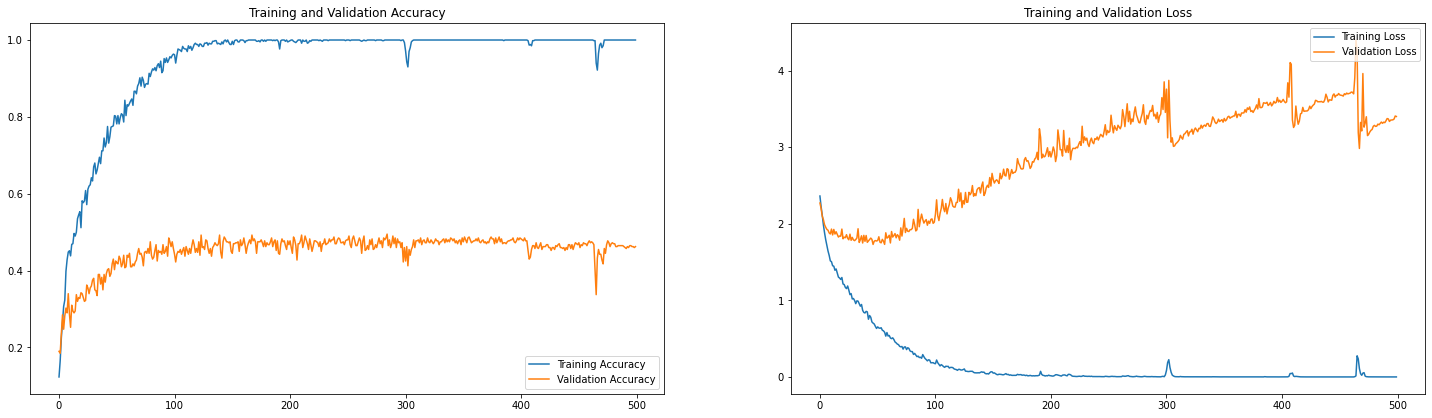

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
import pickle
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>

In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [74]:
#predictions = (model.predict(x_val) > 0.5).astype("int32")
#classes_x=np.argmax(predict_x,axis=1)
#predictions = model.predict_classes(x_val)
predictions=model.predict(x_val)
print("predictions.shape before reshape",predictions.shape)
classes_x=np.argmax(predictions,axis=1)
predictions = predictions.reshape(1,-1)[0]
print("predictions.shape after reshape",predictions.shape)
print("y_val before reshape:",y_val.shape)
#y_val = y_val.reshape(1,-1)[0]
#y_val = y_val.reshape([40, 10])
print("y_val after reshape:",y_val.shape)
#print(classification_report(y_val, predictions, target_names = labels))

predictions.shape before reshape (400, 10)
predictions.shape after reshape (4000,)
y_val before reshape: (400,)
y_val after reshape: (400,)


In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

ValueError: Found input variables with inconsistent numbers of samples: [400, 4000]

# Transfer Learning based modeling

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")

In [ ]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")                                     
                                ])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

In [ ]:
model.summary()

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import pickle
history = pickle.load(open('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/Genre-Classification-using-Deep-learning-main/history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()

In [ ]:
predictions = model.predict_classes(x_val)
print("predictions.shape before reshape",predictions.shape)
predictions = predictions.reshape(1,-1)[0]
print("predictions.shape after reshape",predictions.shape)
print("y_val shape:",y_val.shape)
print(classification_report(y_val, predictions, target_names = labels))

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

In [ ]:
model.save_weights('500_epoch_transfer_lr.cpkt')
pickle.dump(history1.history, open('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/Genre-Classification-using-Deep-learning-main/history_500_epoch_tr.pkl','wb'))


## Multi-Model Training

In [ ]:
sp_train = get_data('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/train')
sp_val = get_data('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/spectrogram/test')

wv_train = get_data('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/wavelets/train')
wv_val = get_data('/Users/goutam/Documents/Documents – Goutam’s MacBook Pro/Python_Edvancer_Notes/Python_Notes/Projects/Deep_Learning/Music_Genre_Project2/Solution/spectro_and_wavelets/wavelets/test')

In [ ]:
x_sp_train = []
y_sp_train = []
x_sp_val = []
y_sp_val = []

for feature, label in sp_train:
  x_sp_train.append(feature)
  y_sp_train.append(label)

for feature, label in sp_val:
  x_sp_val.append(feature)
  y_sp_val.append(label)

# Normalize the data
x_sp_train = np.array(x_sp_train) / 255
x_sp_val = np.array(x_sp_val) / 255

x_sp_train.reshape(-1, img_size, img_size, 1)
y_sp_train = np.array(y_sp_train)

x_sp_val.reshape(-1, img_size, img_size, 1)
y_sp_val = np.array(y_sp_val)

In [ ]:
x_wv_train = []
y_wv_train = []
x_wv_val = []
y_wv_val = []

for feature, label in wv_train:
  x_wv_train.append(feature)
  y_wv_train.append(label)

for feature, label in wv_val:
  x_wv_val.append(feature)
  y_wv_val.append(label)

# Normalize the data
x_wv_train = np.array(x_wv_train) / 255
x_wv_val = np.array(x_wv_val) / 255

x_wv_train.reshape(-1, img_size, img_size, 1)
y_wv_train = np.array(y_wv_train)

x_wv_val.reshape(-1, img_size, img_size, 1)
y_wv_val = np.array(y_wv_val)

In [ ]:
datagen_sp = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_sp.fit(x_sp_train)

datagen_wv = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_wv.fit(x_wv_train)

In [ ]:
input_sp = keras.Input(shape=(256,256,3))
input_wv = keras.Input(shape=(256,256,3))

x = Conv2D(32,3,padding="same", activation="relu")(input_sp)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
x = keras.Model(inputs=input_sp, outputs=x)

y = Conv2D(32,3,padding="same", activation="relu")(input_wv)
y = MaxPool2D()(y)
y = Conv2D(64, 3, padding="same", activation="relu")(y)
y = MaxPool2D()(y)
y = Dropout(0.4)(y)
y = Flatten()(y)
y = Dense(128,activation="relu")(y)
y = keras.Model(inputs=input_wv, outputs=y)

from tensorflow.keras.layers import concatenate
combined = concatenate([x.output, y.output])

z = Dense(32, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
model.summary()

In [ ]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history2 = model.fit([x_sp_train,x_wv_train],y_sp_train,epochs = 500, validation_data = ([x_sp_val,x_wv_val], y_sp_val))
import pickle
model.save_weights('500_epoch_multi_lr.cpkt')
pickle.dump(history2.history, open('history_500_epoch_multi.pkl','wb'))

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import pickle
history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('multi_plot1.png',bbox_inches = 'tight')
plt.clf()

In [ ]:
predictions = model.predict([x_sp_val,x_wv_val])
print(classification_report(y_wv_val, np.argmax(predictions, axis=1), target_names = labels))

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
predictions = np.argmax(predictions, axis=1)
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx3.png',bbox_inches = 'tight')

In [ ]:
epochs_range = range(500)
import matplotlib.pyplot as plt
import pickle 
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc1 = history['accuracy']
val_acc1 = history['val_accuracy']
loss1 = history['loss']
val_loss1 = history['val_loss']

history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc2 = history['accuracy']
val_acc2 = history['val_accuracy']
loss2 = history['loss']
val_loss2 = history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)
ax1.plot(epochs_range, acc2, label='Multi modal Training Accuracy', c = '#171c1c', linewidth=4)
ax1.plot(epochs_range, val_acc2, label='Multi modal Validation Accuracy', c='#62176e', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)
ax2.plot(epochs_range, loss2, label='Multi modal Training Loss',c = '#171c1c', linewidth=4)
ax2.plot(epochs_range, val_loss2, label='Multi modal learning Validation Loss', c='#62176e', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()